In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [3]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [4]:
df = pd.read_csv('./ML/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
df.shape

(14, 5)

In [6]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [7]:
df['temp'].value_counts()

temp
mild    6
hot     4
cool    4
Name: count, dtype: int64

In [8]:
np.unique(df['temp'])

array(['cool', 'hot', 'mild'], dtype=object)

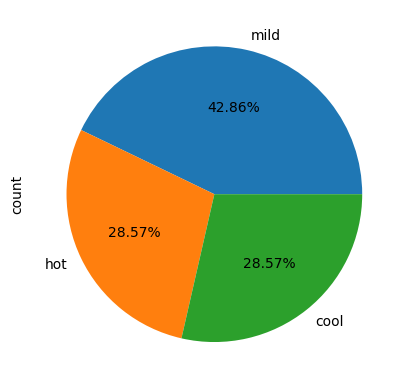

In [9]:
df['temp'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

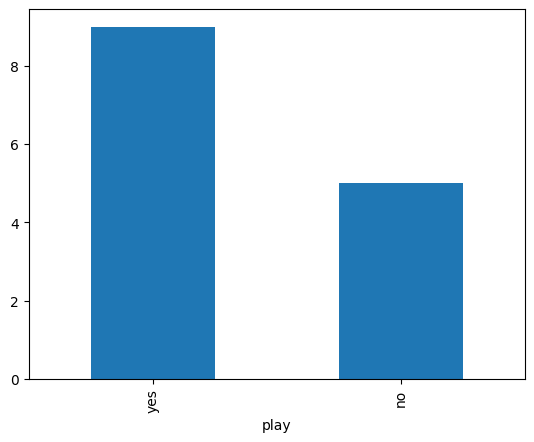

In [10]:
df['play'].value_counts().plot(kind='bar')
plt.show()

In [11]:
x = df[['outlook','temp','humidity','windy']]
y = df[['play']]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=3,random_state=42)

In [13]:
x_train.shape

(11, 4)

In [14]:
x_test.shape

(3, 4)

In [17]:
ohe= OneHotEncoder()
ohe.fit(x_train)

x_train_ohe = ohe.transform(x_train).toarray()

x_train_ohe

array([[1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]])

In [19]:
ohe_df = pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out(x_train.columns))

In [20]:
ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [22]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

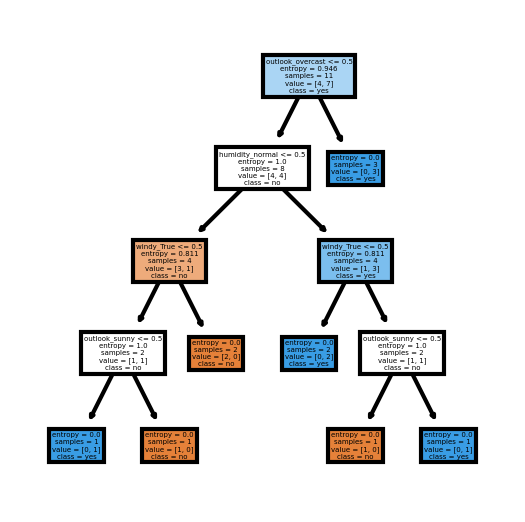

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=300)
tree.plot_tree(clf,
          feature_names=ohe_df.columns,
          class_names= np.unique(y).astype('str'),filled=True
          )
plt.show()


In [25]:
x_test_ohe = ohe.transform(x_test)
y_preds = clf.predict(x_test_ohe)
print('Accuracy : ', accuracy_score(y_test, y_preds))

Accuracy :  1.0


In [27]:
from sklearn.metrics import confusion_matrix

In [29]:
cf_matrix = confusion_matrix(y_test, y_preds)
cf_matrix

array([[1, 0],
       [0, 2]], dtype=int64)

In [30]:
tn,fp,fn,tp = confusion_matrix(y_test, y_preds).ravel()

In [31]:
tn,fp,fn,tp

(1, 0, 0, 2)

In [32]:
tn

1

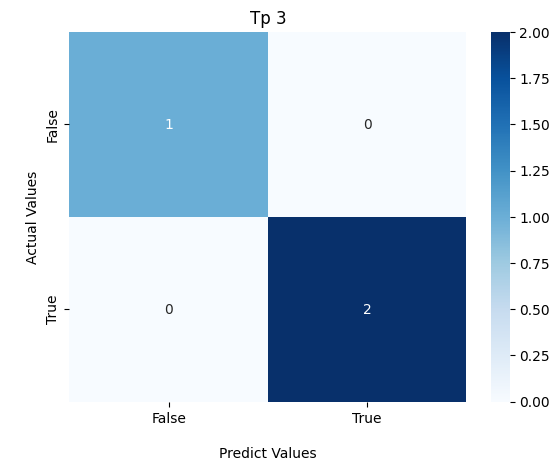

In [36]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Tp 3')
ax.set_xlabel('\nPredict Values')
ax.set_ylabel('\nActual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


In [35]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_test,y_preds, pos_label= 'yes', average='binary')

1.0

In [37]:
#exemple1

clf = DecisionTreeClasifier(criterion='entropy', max_depth=1)
clf.fit(x_train_ohe, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=300)
tree.plot_tree(clf,
          feature_names=ohe_df.columns,
          class_names= np.unique(y).astype('str'),filled=True
          )
plt.show()


NameError: name 'DecisionTreeClasifier' is not defined

In [38]:
#exemple2

clf = DecisionTreeClasifier(criterion='entropy', min_samples_leaf=2)
clf.fit(x_train_ohe, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=300)
tree.plot_tree(clf,
          feature_names=ohe_df.columns,
          class_names= np.unique(y).astype('str'),filled=True
          )
plt.show()

NameError: name 'DecisionTreeClasifier' is not defined